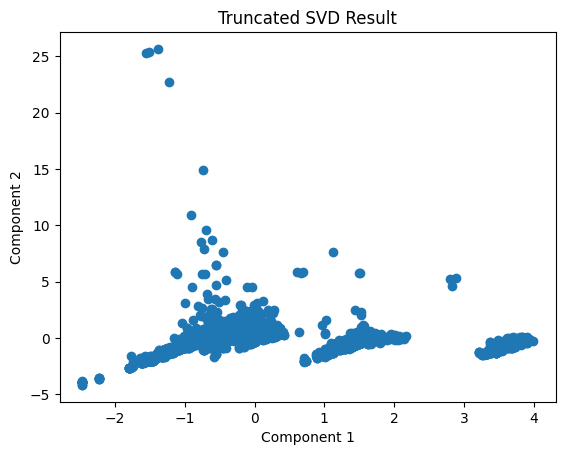

In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv('/content/Dataset_3.csv')

# Sample a subset of the data if it's very large (e.g., 10% of the data)
data_sample = data.sample(frac=0.1, random_state=42)

# Replace inf/-inf with NaN
data_sample.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define numerical and categorical columns
numeric_features = data_sample.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data_sample.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                ('scaler', StandardScaler())]), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)  # Keep sparse_output as default (True)
    ])

# Create a pipeline with TruncatedSVD
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svd', TruncatedSVD(n_components=2))])

# Fit and transform the pipeline
data_processed = pipeline.fit_transform(data_sample)

# Plot the result
plt.scatter(data_processed[:, 0], data_processed[:, 1])
plt.title('Truncated SVD Result')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


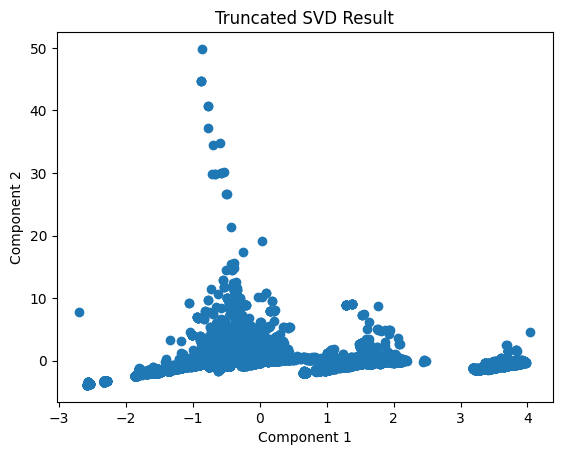

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv('/content/Dataset_3.csv')

# Sample a subset of the data if it's very large (e.g., 10% of the data)
# data = data.sample(frac=0.1, random_state=42)

# Replace inf/-inf with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define numerical and categorical columns
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                ('scaler', StandardScaler())]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with TruncatedSVD
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svd', TruncatedSVD(n_components=2))])

# Fit and transform the pipeline
data_processed = pipeline.fit_transform(data)

# Plot the result
plt.scatter(data_processed[:, 0], data_processed[:, 1])
plt.title('Truncated SVD Result')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


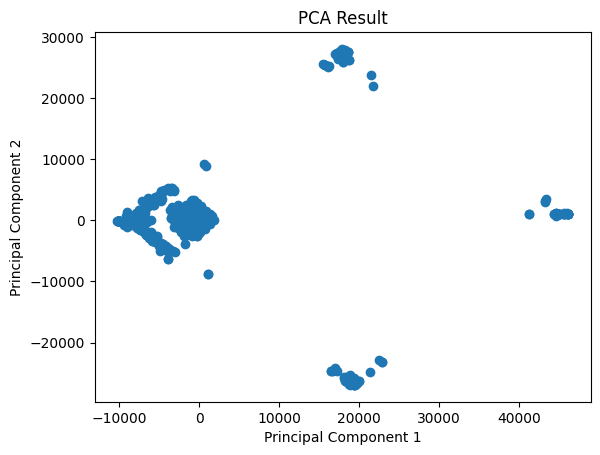

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset
data_df = pd.read_csv('/content/Dataset_3.csv')

# Sampling a very small part of the data for speed (e.g., 1% of the data)
data_sample = data_df.sample(frac=0.01, random_state=42)

# Select only numeric columns
data_numeric = data_sample.select_dtypes(include=['int64', 'float64'])

# Replace inf/-inf with NaN and drop rows with any NaN values
data_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
data_numeric.dropna(inplace=True)

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_numeric)

# Plot the result
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


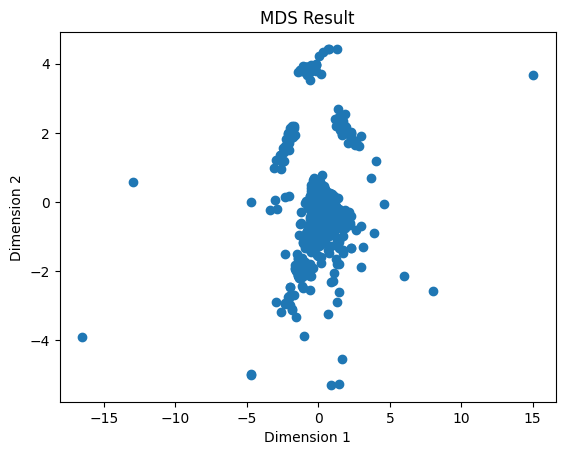

In [15]:
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your dataset
data_df = pd.read_csv('/content/Dataset_3.csv')

# Sampling a very small part of the data for speed (e.g., 1% of the data)
data_sample = data_df.sample(frac=0.01, random_state=42)

# Select only numeric columns for simplicity
data_numeric = data_sample.select_dtypes(include=['int64', 'float64'])

# Replace inf/-inf with NaN and drop rows with any NaN values
data_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
data_numeric.dropna(inplace=True)

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply MDS
mds = MDS(n_components=2)
data_mds = mds.fit_transform(data_scaled)

# Plot the result
plt.scatter(data_mds[:, 0], data_mds[:, 1])
plt.title('MDS Result')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


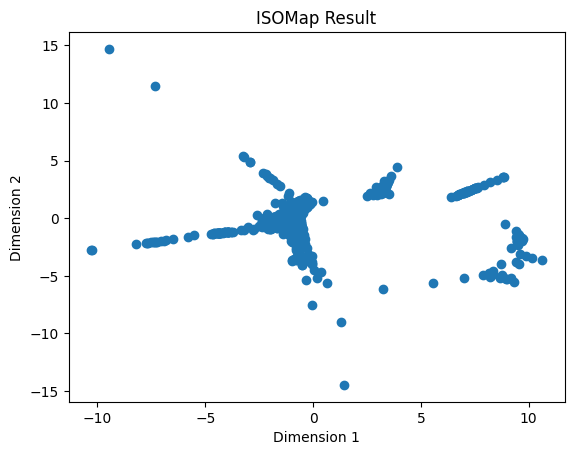

In [17]:
import pandas as pd
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your dataset
data_df = pd.read_csv('/content/Dataset_3.csv')

# Sampling a very small part of the data for efficiency (e.g., 1% of the data)
data_sample = data_df.sample(frac=0.01, random_state=42)

# Select only numeric columns for simplicity
data_numeric = data_sample.select_dtypes(include=['int64', 'float64'])

# Replace inf/-inf with NaN and drop rows with any NaN values
data_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
data_numeric.dropna(inplace=True)

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply ISOMap
isomap = Isomap(n_components=2)
data_isomap = isomap.fit_transform(data_scaled)

# Plot the result
plt.scatter(data_isomap[:, 0], data_isomap[:, 1])
plt.title('ISOMap Result')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


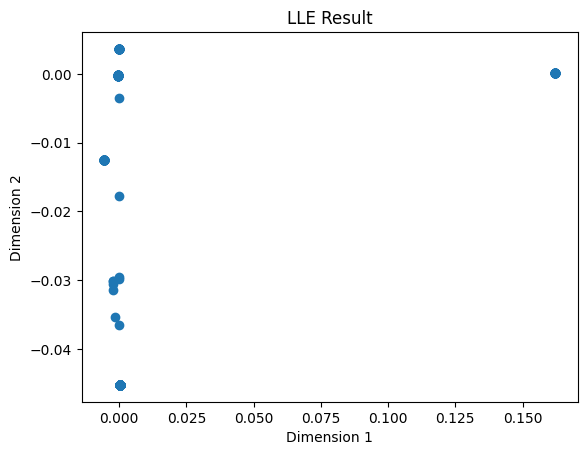

In [20]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your dataset
data_df = pd.read_csv('/content/Dataset_3.csv')

# Sampling a very small part of the data for efficiency (e.g., 1% of the data)
data_sample = data_df.sample(frac=0.01, random_state=42)

# Select only numeric columns for simplicity
data_numeric = data_sample.select_dtypes(include=['int64', 'float64'])

# Replace inf/-inf with NaN and drop rows with any NaN values
data_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
data_numeric.dropna(inplace=True)

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply LLE
lle = LocallyLinearEmbedding(n_components=2)
data_lle = lle.fit_transform(data_scaled)

# Plot the result
plt.scatter(data_lle[:, 0], data_lle[:, 1])
plt.title('LLE Result')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


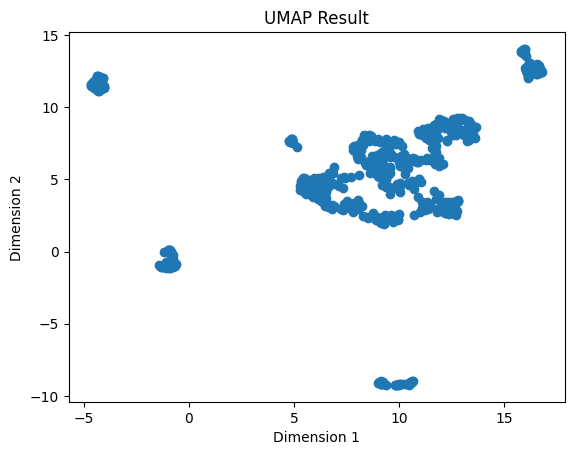

In [24]:
!pip install umap-learn
import umap
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
data_df = pd.read_csv('/content/Dataset_3.csv')

# Sampling a very small part of the data (e.g., 1% of the data)
data_sample = data_df.sample(frac=0.01, random_state=42)

# Select only numeric columns for simplicity
data_numeric = data_sample.select_dtypes(include=['int64', 'float64'])

# Replace inf/-inf with NaN and drop rows with any NaN values
data_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
data_numeric.dropna(inplace=True)

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply UMAP
umap_model = umap.UMAP(n_components=2)
data_umap = umap_model.fit_transform(data_scaled)

# Plot the result
plt.scatter(data_umap[:, 0], data_umap[:, 1])
plt.title('UMAP Result')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


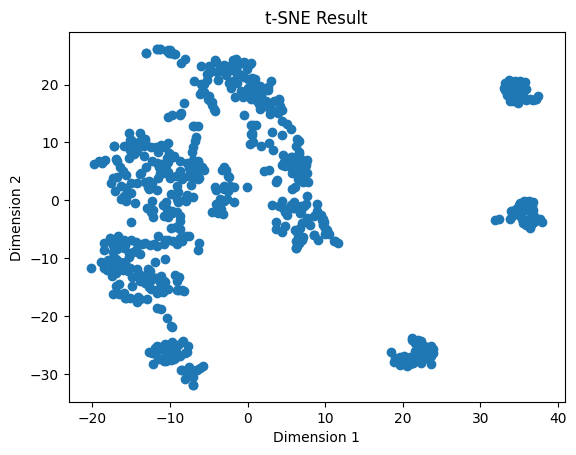

In [25]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
data_df = pd.read_csv('/content/Dataset_3.csv')

# Sampling a very small part of the data (e.g., 1% of the data)
data_sample = data_df.sample(frac=0.01, random_state=42)

# Select only numeric columns for simplicity
data_numeric = data_sample.select_dtypes(include=['int64', 'float64'])

# Replace inf/-inf with NaN and drop rows with any NaN values
data_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
data_numeric.dropna(inplace=True)

# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply t-SNE
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data_scaled)

# Plot the result
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.title('t-SNE Result')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
